In [1]:
pip install numpy pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# ЗАДАЧА 1
import numpy as np
import pandas as pd

# Набор значений z, которые нужно пропустить через активации
z_values = np.array([-3, -1, -0.5, 0, 0.5, 1, 3], dtype=float)

# функции активации
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

# Таблица значений
rows = []
for z in z_values:
    row = {
        "z": z,
        "sigmoid(z)": sigmoid(z),
        "tanh(z)": tanh(z),
        "relu(z)": relu(z),
    }
    rows.append(row)

df = pd.DataFrame(rows)
df

,z,sigmoid(z),tanh(z),relu(z)
0,-3.0,0.047426,-0.995055,0.0
1,-1.0,0.268941,-0.761594,0.0
2,-0.5,0.377541,-0.462117,0.0
3,0.0,0.500000,0.000000,0.0
4,0.5,0.622459,0.462117,0.5
5,1.0,0.731059,0.761594,1.0
6,3.0,0.952574,0.995055,3.0


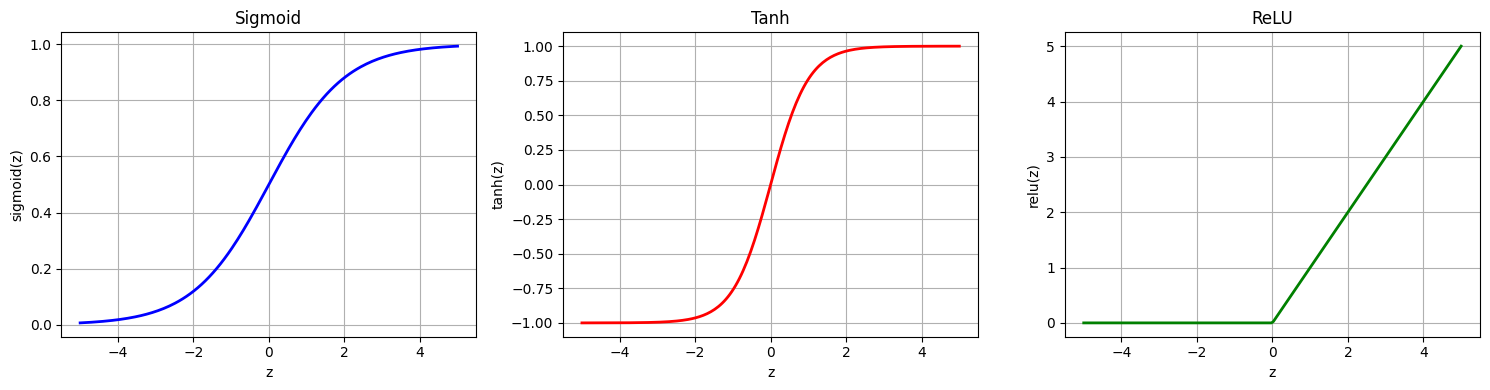

In [5]:
# ЗАДАЧА 2
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-5, 5, 200)

# Вычисление значений 3 активаций
s = sigmoid(z)
t = tanh(z)
r = relu(z)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(z, s, 'b-', linewidth=2)
plt.title('Sigmoid')
plt.grid(True)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')

plt.subplot(1, 3, 2)
plt.plot(z, t, 'r-', linewidth=2)
plt.title('Tanh')
plt.grid(True)
plt.xlabel('z')
plt.ylabel('tanh(z)')

plt.subplot(1, 3, 3)
plt.plot(z, r, 'g-', linewidth=2)
plt.title('ReLU')
plt.grid(True)
plt.xlabel('z')
plt.ylabel('relu(z)')

plt.tight_layout()
plt.show()

In [ ]:
# ЗАДАЧА 3
X = np.array([
    [1.0, 0.0, 0.5],
    [0.0, 1.0, -0.5],
    [1.0, 1.0, 0.0],
])

w = np.array([0.3, -0.2, 0.5]) # Параметры нейрона
b = 0.1

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_neuron(X, w, b, activation):
    """
    X: матрица (N, d), по строкам — примеры
    w: вектор (d,)
    b: скаляр
    activation: функция, применяемая к линейной комбинации
    """
    # Линейная комбинация
    z = np.dot(X, w) + b
    a = activation(z)
    return a

# forward_neuron для активации sigmoid
outputs = forward_neuron(X, w, b, sigmoid)
for i, output in enumerate(outputs):
    print(f"Пример {i+1}: {output:.4f}")

Пример 1: 0.6570
Пример 2: 0.4134
Пример 3: 0.5498


In [ ]:
# ЗАДАЧА 4
X = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0],
])

y = np.array([0, 0, 0, 1])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def linear_classifier(X, w, b):
    z = np.dot(X, w) + b # Линейная комбинация
    y_pred = sigmoid(z) #Применение сигмоиды
    return y_pred

param_sets = [
    (np.array([1.0, 1.0]), -1.5),
    (np.array([2.0, 2.0]), -3.0),
    (np.array([1.0, -1.0]), 0.0),
]

for w, b in param_sets:
    print(f"Параметры: w={w}, b={b}")
    y_hat = linear_classifier(X, w, b)
    y_hat_rounded = np.round(y_hat)
    
    print(f"Предсказания: {y_hat}")
    print(f"Округленные: {y_hat_rounded}")
    print(f"Истинные: {y}")
    print(f"Совпадение: {np.array_equal(y_hat_rounded, y)}")

Параметры: w=[1. 1.], b=-1.5
Предсказания: [0.18242552 0.37754067 0.37754067 0.62245933]
Округленные: [0. 0. 0. 1.]
Истинные: [0 0 0 1]
Совпадение: True
Параметры: w=[2. 2.], b=-3.0
Предсказания: [0.04742587 0.26894142 0.26894142 0.73105858]
Округленные: [0. 0. 0. 1.]
Истинные: [0 0 0 1]
Совпадение: True
Параметры: w=[ 1. -1.], b=0.0
Предсказания: [0.5        0.26894142 0.73105858 0.5       ]
Округленные: [0. 0. 1. 0.]
Истинные: [0 0 0 1]
Совпадение: False


In [11]:
# ЗАДАЧА 5 
def cross_entropy_one_example(y_pred, y_true_index):
    """
    y_pred: вектор предсказанных вероятностей (например, shape (K,))
    y_true_index: индекс истинного класса (int)
    """
    return -np.log(y_pred[y_true_index])

y_pred_1 = np.array([0.7, 0.2, 0.1])
y_true_1 = 0

y_pred_2 = np.array([0.1, 0.2, 0.7])
y_true_2 = 0

# Потери
loss_1 = cross_entropy_one_example(y_pred_1, y_true_1)
loss_2 = cross_entropy_one_example(y_pred_2, y_true_2)

print(f"1: y_pred = {y_pred_1}, истинный класс = {y_true_1}")
print(f"Потери: {loss_1:.4f}")
print(f"Вероятность истинного класса: {y_pred_1[y_true_1]:.4f}")

print(f"\n2: y_pred = {y_pred_2}, истинный класс = {y_true_2}")
print(f"Потери: {loss_2:.4f}")
print(f"Вероятность истинного класса: {y_pred_2[y_true_2]:.4f}")

print(f"\nРазница в потерях: {loss_2 - loss_1:.4f}")

1: y_pred = [0.7 0.2 0.1], истинный класс = 0
Потери: 0.3567
Вероятность истинного класса: 0.7000

2: y_pred = [0.1 0.2 0.7], истинный класс = 0
Потери: 2.3026
Вероятность истинного класса: 0.1000

Разница в потерях: 1.9459
